In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
final = pd.read_csv('Train.csv')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Insight 1

In [3]:
insight_1 = final.groupby(['Warehouse_block','Reached.on.Time_Y.N']).agg({'ID': ['count']}).reset_index()
insight_1.columns = ['Warehouse block','Reached on time','count']
insight_1['Reached on time'] = insight_1['Reached on time'].replace([0,1],['Yes','No'])
insight_1

,Warehouse block,Reached on time,count
0,A,Yes,758
1,A,No,1075
2,B,Yes,729
3,B,No,1104
4,C,Yes,739
5,C,No,1094
6,D,Yes,738
7,D,No,1096
8,F,Yes,1472
9,F,No,2194


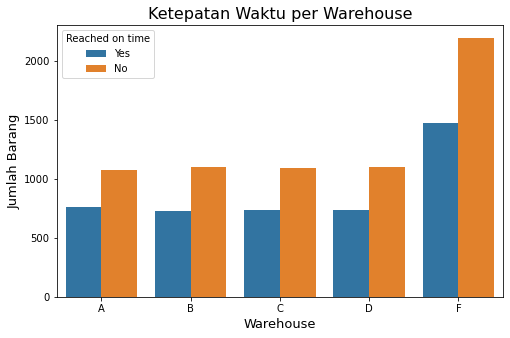

In [4]:
plt.figure(figsize = (8,5))
sns.barplot(x='Warehouse block', y='count', hue='Reached on time', data=insight_1)

plt.title('Ketepatan Waktu per Warehouse',fontsize=16)
plt.xlabel('Warehouse', fontsize=13)
plt.ylabel('Jumlah Barang', fontsize=13)
plt.show()

Pada setiap warehouse selalu ada keterlambatan pengiriman. Selain itu, penyimpanan barang menumpuk di warehouse F. **Disarankan untuk melakukan distribusi ulang penyimpanan barang supaya lebih merata pada seluruh warehouse.**

### Insight 2

In [29]:
insight_2 = final.groupby(['Product_importance','Reached.on.Time_Y.N']).agg({'ID': ['count']}).reset_index()
insight_2.columns = ['Product importance','Reached on time','count']
insight_2 = pd.pivot_table(insight_2,
                          index = ['Product importance'],
                          columns = ['Reached on time'],
                          values = ['count']
                          ).reset_index()
insight_2 = insight_2.reindex([1,2,0]).reset_index(drop=True)
insight_2.columns = ['Product importance','On time','Late']
insight_2['%on time'] = round(insight_2['On time']/(insight_2['On time'] + insight_2['Late'])*100,2)
insight_2['%late']    = round(insight_2['Late']/(insight_2['On time'] + insight_2['Late'])*100,2)
insight_2 = insight_2.drop(['On time','Late'], axis=1)
insight_2

,Product importance,%on time,%late
0,low,40.72,59.28
1,medium,40.95,59.05
2,high,35.02,64.98


<Figure size 648x360 with 0 Axes>

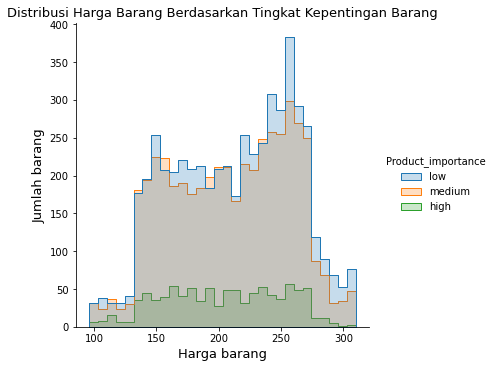

In [50]:
plt.figure(figsize = (9,5))
sns.displot(x='Cost_of_the_Product', hue='Product_importance', data=final, element='step')

plt.title('Distribusi Harga Barang Berdasarkan Tingkat Kepentingan Barang',fontsize=13)
plt.xlabel('Harga barang', fontsize=13)
plt.ylabel('Jumlah barang', fontsize=13)
plt.show()

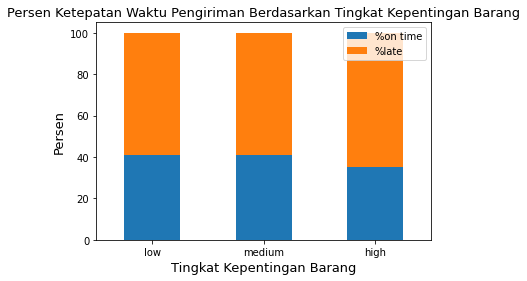

In [46]:
insight_2.plot.bar(x='Product importance', stacked=True)
plt.figsize = (10,5)

plt.title('Persen Ketepatan Waktu Pengiriman Berdasarkan Tingkat Kepentingan Barang',fontsize=13)
plt.xlabel('Tingkat Kepentingan Barang', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Persen', fontsize=13)
plt.show()

Dari distribusi dapat dilihat bahwa **barang dengan kepentingan 'low' dan 'medium' memiliki tingkat pemesanan yang tinggi** dan **tingkat kepentingan barang tidak didasarkan pada harga barang**. <br>
Adapun dari grafik persen ketepatan waktu, persentase pengiriman yang terlambat hampir sama pada seluruh tingkat kepentingan barang. <br>
Mempertimbangkan kedua hal tersebut, maka disarankan untuk **mengutamakan pengiriman barang tingkat 'low' dan 'medium'**.

### Insight 3

In [82]:
insight_3 = final[['Cost_of_the_Product','Discount_offered','Reached.on.Time_Y.N']]
insight_3['%discount'] = round(insight_3['Discount_offered']/insight_3['Cost_of_the_Product']*100,2)
insight_3['Reached.on.Time_Y.N'] = insight_3['Reached.on.Time_Y.N'].replace([0,1],['Yes','No'])
insight_3

C:\Users\user\AppData\Local\Temp\ipykernel_13328\1544678875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insight_3['%discount'] = round(insight_3['Discount_offered']/insight_3['Cost_of_the_Product']*100,2)
C:\Users\user\AppData\Local\Temp\ipykernel_13328\1544678875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insight_3['Reached.on.Time_Y.N'] = insight_3['Reached.on.Time_Y.N'].replace([0,1],['Yes','No'])


,Cost_of_the_Product,Discount_offered,Reached.on.Time_Y.N,%discount
0,177,44,No,24.86
1,216,59,No,27.31
2,183,48,No,26.23
3,176,10,No,5.68
4,184,46,No,25.00
...,...,...,...,...
10994,252,1,No,0.40
10995,232,6,Yes,2.59
10996,242,4,Yes,1.65
10997,223,2,Yes,0.90


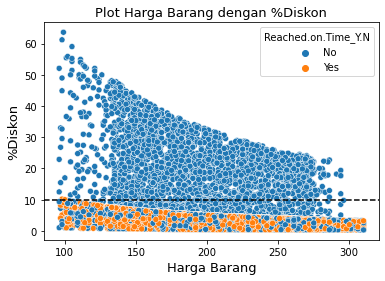

In [89]:
sns.scatterplot(x='Cost_of_the_Product', y='%discount', hue='Reached.on.Time_Y.N', data=insight_3)

plt.title('Plot Harga Barang dengan %Diskon',fontsize=13)
plt.xlabel('Harga Barang', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('%Diskon', fontsize=13)
plt.axhline(y=10, color='k', ls='--')
plt.figsize = (20,10)
plt.show()

Dapat dilihat dari grafik bahwa barang yang diberi diskon lebih dari 10% mengalami keterlambatan pengiriman. <br>
**Pengiriman untuk barang yang diskon perlu diperhatikan** supaya customer tidak mengira company mengutamakan pengiriman barang dengan diskon kecil.